# **Data Exploration and Demand Forcasting**

## Motivation

In every company data is important for decision making. The fuel distribution company in nigeria is of no different as a result weproposethe followin Project to forcast fuel predictions. Steps in this project will include the following 

- Data Collection and cleaning 

- Data Exploration 

- Data Generation

- Forcasting 

- Inventory Management

In [2]:
#import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import statsmodels.api as sm

#### Data Generation 

- The amount of data received was valid for only 2 months as a result will extrapolate on that and generate syntheic data.

In [ ]:
# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('Final.xlsx')

In [4]:
df.head()

,Date,PUMP 1A,PUMP 1B,PUMP 2A,PUMP 2B,PUMP 3A,PUMP 3B,PUMP 4A,PUMP 4B,Total
0,2023-01-01,0.00,1923.25,1013.21,0.0,1866.89,0.0,0,0,4803.35
1,2023-01-02,1678.52,0.00,2894.28,0.0,2071.83,0.0,0,0,6644.63
2,2023-01-03,3582.78,0.00,2877.08,0.0,1974.04,0.0,0,0,8433.90
3,2023-01-04,2710.96,0.00,1600.70,0.0,2883.58,0.0,0,0,7195.24
4,2023-01-05,2040.29,0.00,2577.68,0.0,1710.97,0.0,0,0,6328.94


In [14]:
df.columns

Index(['Date', 'PUMP 1A', 'PUMP 1B', 'PUMP 2A', 'PUMP 2B', 'PUMP 3A',
       'PUMP 3B', 'PUMP 4A', 'PUMP 4B', 'Total'],
      dtype='object')

In [12]:
df.shape

(257, 10)

In [19]:
df.drop(['PUMP 4A', 'PUMP 4B'], axis =True)

,Date,PUMP 1A,PUMP 1B,PUMP 2A,PUMP 2B,PUMP 3A,PUMP 3B,Total
0,2023-01-01,0.00,1923.25,1013.21,0.00,1866.89,0.00,4803.35
1,2023-01-02,1678.52,0.00,2894.28,0.00,2071.83,0.00,6644.63
2,2023-01-03,3582.78,0.00,2877.08,0.00,1974.04,0.00,8433.90
3,2023-01-04,2710.96,0.00,1600.70,0.00,2883.58,0.00,7195.24
4,2023-01-05,2040.29,0.00,2577.68,0.00,1710.97,0.00,6328.94
...,...,...,...,...,...,...,...,...
252,2023-09-10,0.00,0.00,0.00,1549.48,0.00,950.01,2499.49
253,2023-09-11,0.00,362.22,0.00,961.09,0.00,1020.20,2343.51
254,2023-09-12,0.00,0.00,0.00,1982.15,0.00,1015.22,2997.37
255,2023-09-13,0.00,0.00,0.00,792.84,0.00,1872.27,2665.11


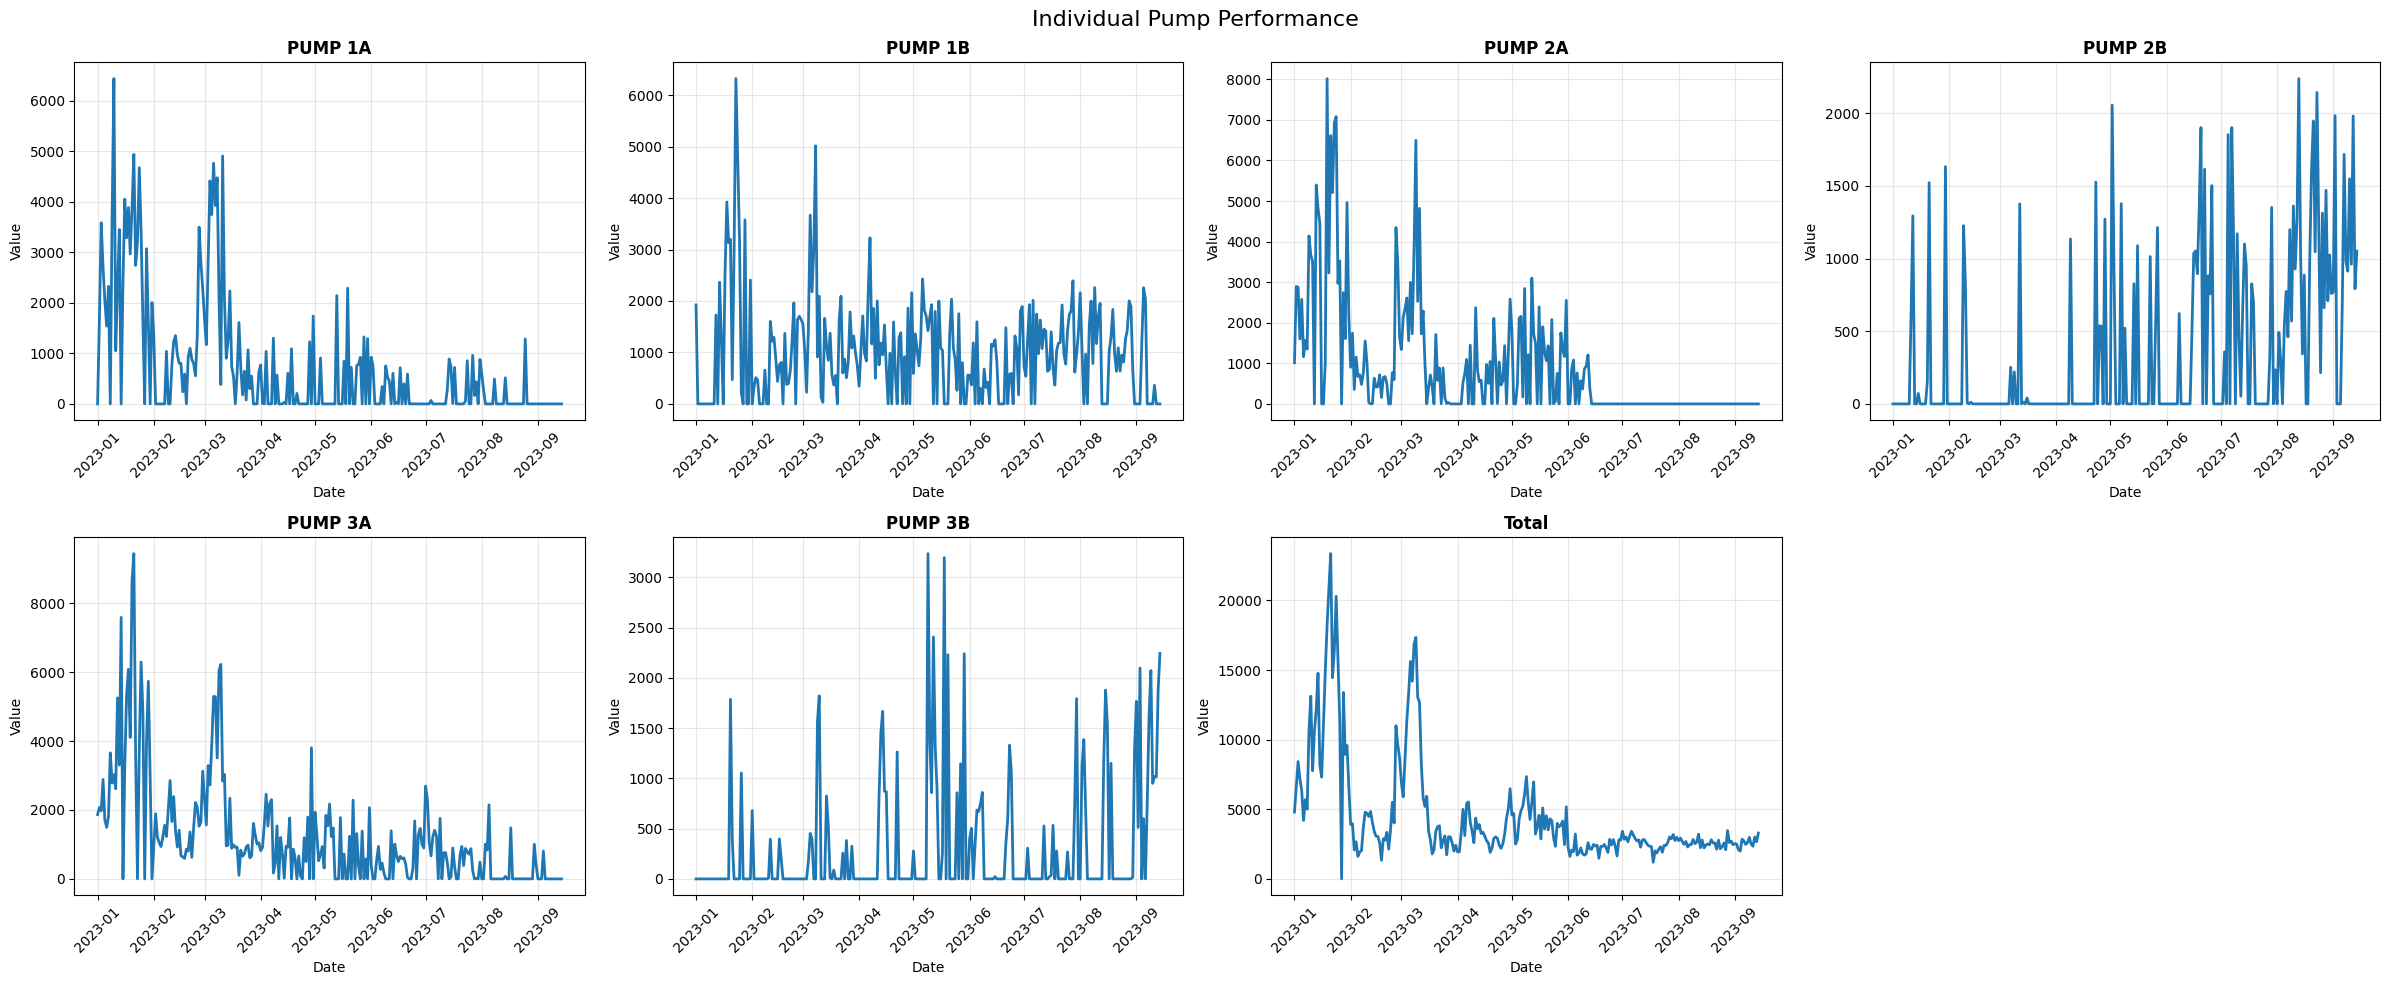

In [20]:
#Create a figure with subplots (2 rows, 6 columns)
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
fig.suptitle('Individual Pump Performance', fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# List of pump columns
pumps = ['PUMP 1A', 'PUMP 1B', 'PUMP 2A', 'PUMP 2B', 
         'PUMP 3A', 'PUMP 3B', 'Total']

# Plot each pump individually
for i, pump in enumerate(pumps):
    axes[i].plot(df['Date'], df[pump], linewidth=2)
    axes[i].set_title(pump, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (you have 12 positions but only 9 pumps)
for i in range(len(pumps), len(axes)):
    axes[i].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()